In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [5]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop - Personal/Files/Data_Files/Portfolio Projects/1 Million songs Spotify/spotify_data.csv', index_col=0)
# df = pd.read_csv('spotify_data.csv', index_col=0)
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

| Feature Name | Description |
|---|---|
| popularity | A measure of the song's popularity on Spotify |
| year | The year the song was released |
| genre | The primary genre of the song |
| danceability | Describes how suitable the track is for dancing |
| energy | Represents the perceived intensity and activity level of the track |
| key | The musical key of the song |
| loudness | The overall loudness of the track in decibels (dB) |
| mode | Indicates whether the track is in major (1) or minor (0) key |
| speechiness | The presence of spoken words in the track |
| acousticness | A confidence measure of whether the track is acoustic |
| instrumentalness | The presence of vocals in the track |
| liveness | A confidence measure of whether the track was performed live |
| valence | The positivity conveyed by the track |
| tempo | The average tempo of the track in beats per minute (BPM) |
| time_signature | The time signature of the track |
| duration_minutes | The duration of the track in minutes |

In [7]:
df.shape

(1159764, 19)

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
null_values = df.isna().sum()
null_values

,0
artist_name,15
track_name,1
track_id,0
popularity,0
year,0
genre,0
danceability,0
energy,0
key,0
loudness,0


In [10]:

missing_data = df[df.isna().any(axis=1)]
missing_data

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
256971,NaN,Cold,10eyeJsKDh26SKEBvSfuBG,17,2017,black-metal,0.2120,0.7080,7,-6.932,1,0.2180,0.000201,0.9060,0.1430,0.0381,126.739,717237,4
256972,NaN,Wither,6xz1O7tOw6Tdvzc3Ev1isc,16,2017,black-metal,0.3170,0.5180,9,-7.418,1,0.0650,0.000258,0.8550,0.7290,0.0747,110.958,525099,4
257024,NaN,Suffer,6hedSqpvIaW0GzrqJnq32D,14,2017,black-metal,0.1090,0.1420,2,-11.807,0,0.0439,0.154000,0.8790,0.1050,0.0350,57.422,565664,3
313028,NaN,"A World, Dead and Gray",7shu4LrpMTsGwa8YotA1My,26,2018,black-metal,0.3770,0.5070,7,-14.889,1,0.0448,0.000103,0.9310,0.2110,0.3380,113.917,466182,4
313050,NaN,Hypoxic,3V8qpQnLVhu82ZvC4Ja8VG,24,2018,black-metal,0.3410,0.4260,11,-17.450,0,0.0496,0.038000,0.8480,0.1130,0.0404,66.628,418945,4
313063,NaN,Bed the Cold Earth,68w6nJMmA9Ui6zV7qXrwIt,22,2018,black-metal,0.1650,0.4610,10,-16.267,1,0.0378,0.001410,0.7890,0.1030,0.1220,72.501,464632,4
313117,NaN,Life Is Long Enough,1NJ8HTD5syI65EJmXUckxB,20,2018,black-metal,0.1800,0.1400,7,-18.017,0,0.0440,0.230000,0.9250,0.1110,0.0357,86.924,476152,4
313153,NaN,Corroded,4zcJ5p91PSG3vDsGJfENDd,17,2018,black-metal,0.1490,0.1440,2,-21.518,0,0.0321,0.771000,0.8590,0.1120,0.0398,85.413,317214,4
313174,NaN,Desiderate,6375ZIE3Pi8BuZOuy8f6g1,16,2018,black-metal,0.1630,0.3210,7,-17.123,0,0.0411,0.148000,0.3240,0.1140,0.0535,66.017,472719,4
313225,NaN,Where Life Should Be,0VCAJwhy4p3tVaGUSnaWGr,15,2018,black-metal,0.1910,0.1630,0,-15.242,0,0.0378,0.102000,0.9070,0.0875,0.0383,137.785,530210,3


In [11]:
# Since there is now way we could get the name of artists or track, we can drop them
df = df.dropna()
df.isna().sum()

,0
artist_name,0
track_name,0
track_id,0
popularity,0
year,0
genre,0
danceability,0
energy,0
key,0
loudness,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

**Skewness:**

Measures the asymmetry of the distribution.
Positive skew indicates a long tail on the right.
Negative skew indicates a long tail on the left.

**Kurtosis:**

Measures the "tailedness" of the distribution.
A high kurtosis indicates a distribution with heavier tails.
A low kurtosis indicates a distribution with lighter tails.

In [14]:
# Statistical check
numerical_cols_df = df[['popularity', 'year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]
skewness = numerical_cols_df.skew()
kurtosis = numerical_cols_df.kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 popularity           0.810033
year                -0.110886
danceability        -0.300162
energy              -0.617285
key                 -0.000085
loudness            -1.908822
mode                -0.559289
speechiness          4.473831
acousticness         0.708284
instrumentalness     0.970880
liveness             1.955640
valence              0.173532
tempo                0.237165
duration_ms         10.301177
time_signature      -3.550804
dtype: float64

Kurtosis:
 popularity            0.065254
year                 -1.169703
danceability         -0.501779
energy               -0.649378
key                  -1.286298
loudness              4.863285
mode                 -1.687199
speechiness          23.917106
acousticness         -1.068162
instrumentalness     -0.861880
liveness              3.502836
valence              -1.077568
tempo                -0.099001
duration_ms         228.305416
time_signature       19.754864
dtype: float64


In [15]:
# # Set the style for the plots
# sns.set(style="whitegrid")

# # Create a boxplot for each numerical column
# num_cols = df.select_dtypes(include=['float64', 'int']).columns  # Get only numerical columns

# for column in num_cols:
#     plt.figure(figsize=(15, 5))
#     sns.boxplot(x=df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.xlabel(column)
#     plt.show()

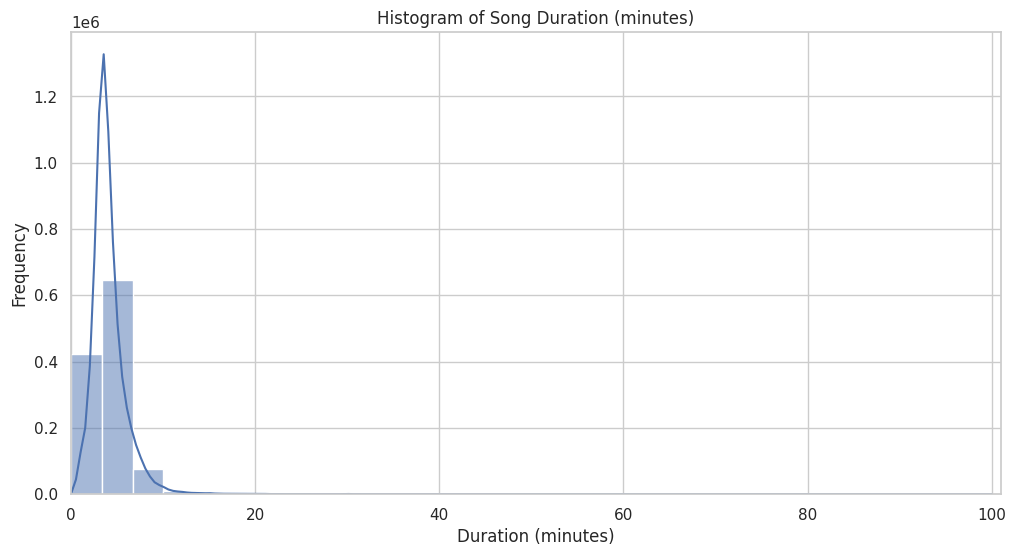

In [16]:
# Create a histogram for duration_ms
# Convert duration from milliseconds to minutes
df['duration_minutes'] = df['duration_ms'] / 60000

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram for duration_minutes
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_minutes'], bins=30, kde=True)  # Adjust the number of bins as needed
plt.title('Histogram of Song Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, df['duration_minutes'].max() + 1)  # Set x-axis limit slightly above max duration for clarity
plt.show()

<Axes: xlabel='popularity'>

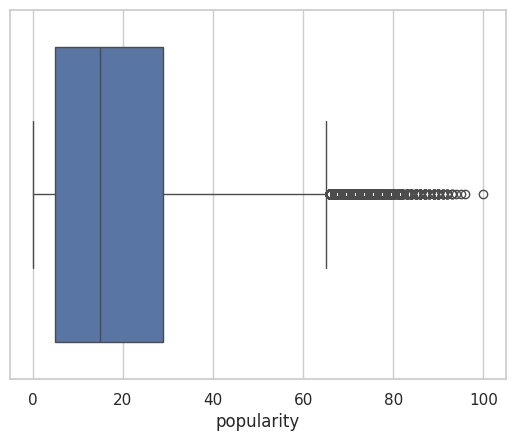

In [17]:
# outlier detection
sns.boxplot(x=df['popularity'])

- Seems to be a few songs that are popular than the general data shows

<Axes: xlabel='duration_ms'>

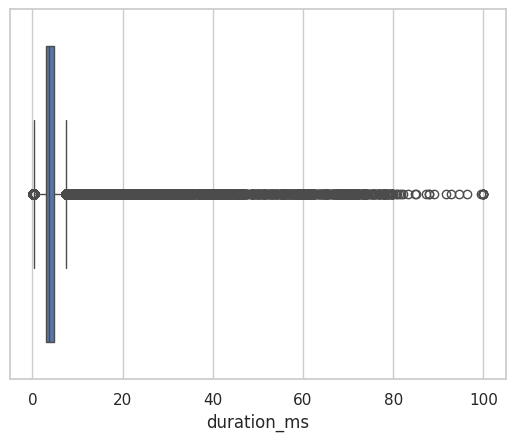

In [18]:
sns.boxplot(x=df['duration_ms']/60000)

In [19]:
df['duration_ms'].max()/1000

6000.495

- 100 minute songs seems unrealistic. We check them by manually searching a sample of them. Lets begin by filtering out songs longer than 7 minutes or 420,000 ms (an abitrary figure)

In [20]:
# Filter for songs with duration greater than 420,000 ms
filtered_songs = df[df['duration_minutes'] > 7].sort_values(by='duration_minutes', ascending=False)
filtered_songs.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
157171,Nature Sounds,Babbling Brook Close Up,7gTgu4Jij9kWjzGlno4cvZ,7,2014,sleep,0.3810,0.997,5,-18.974,0,0.1100,0.9300,0.899,0.970,0.01510,106.589,6000495,1,100.008250
103376,Nature Sounds,Rainstorm Ambience with Thunder Rolls and Peels,0tFT1PFYKfjBGDTZlivRfY,14,2013,sleep,0.1520,0.947,11,-24.524,0,0.0754,0.0667,0.910,0.817,0.00829,135.853,6000461,3,100.007683
103634,Nature Sounds,Tranquil Rain Shower Ambience,7BOvbAZGtyzNjCqEXB7200,7,2013,sleep,0.2490,0.999,11,-27.897,0,0.0856,0.9600,0.730,0.934,0.00001,70.451,6000328,4,100.005467
103697,Nature Sounds,Beachside Rolling Wave Ambience,2tLOzXjjVSItP1P6lphtJS,4,2013,sleep,0.0778,1.000,0,-13.305,1,0.0646,0.8110,0.988,0.946,0.00001,83.095,6000161,4,100.002683
103592,Nature Sounds,Constant Small Waterfall Stream,7mJ1ef2Lit8lKecqVWJPsd,6,2013,sleep,0.0587,1.000,11,-14.575,1,0.0717,0.9780,0.567,0.948,0.00001,65.363,6000061,3,100.001017


In [21]:
filtered_songs_greater_twenty = df[df['duration_minutes'] > 15].sort_values(by='duration_minutes', ascending=False)
filtered_songs_greater_twenty.sample(2)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
828605,Rajan & Sajan Mishra,Raag Saraswati,5uAtUmnu9XB9SzxXB3zbwp,0,2002,indian,0.244,0.646,10,-8.695,1,0.0446,0.785,0.000,0.0746,0.259,93.763,2726880,4,45.448000
399034,Bismillah Khan,Yaman,5HzDsWZExDXHMlIeKp8vne,7,2019,indian,0.365,0.648,2,-14.663,1,0.0473,0.526,0.144,0.4470,0.565,145.833,1316755,4,21.945917


In [22]:
sleep_genre = df[df['genre'] == 'sleep']
sleep_genre.head(3)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
49942,Rain Sounds,White Noise,7dTyZl4cBRKnPBeq1fdrHY,60,2012,sleep,0.0000,0.601,4,-13.753,0,0.0000,0.119000,0.771,0.968,0.0000,0.000,240000,0,4.000000
49943,Nature Sounds,Relaxing Constant Rain Storm with Distant Thun...,1nKY2o8XQG1RvUCpBV5VSK,54,2012,sleep,0.0735,0.997,8,-12.484,1,0.0995,0.000626,0.975,0.871,0.0119,81.214,570203,4,9.503383
49944,Nature Sounds,Calm Rolling Thunder and Soothing Rain,5Y3bt7xbhZwwHfTPK5hWEg,50,2012,sleep,0.0818,0.294,0,-25.842,1,0.0898,0.067400,0.893,0.359,0.0384,85.349,570270,3,9.504500


In [23]:
df['popularity'].mean()

18.383088395065133

In [24]:
# Function to print out data summary
def data_summary(data):
  '''
  '''
  # unique artist
  unique_artists = df['artist_name'].nunique()
  print(f"Number of unique artists: {unique_artists}")

  # unique tracks
  unique_tracks = df['track_name'].nunique()
  print(f"NUmber of unique trackss: {unique_tracks}")

  print('____________________________')

  # Year Range of data collected
  earliest_year = df['year'].min()
  latest_year =  df['year'].max()
  print(f"Earliest year in the data is {earliest_year} and latest year is {latest_year}")

  print('____________________________')

  # Unique music genres in the data and print the genre names
  unique_genres = df['genre'].nunique()
  print(f"Number of unique genres: {unique_genres}")

  print('____________________________')

  genres = df['genre'].unique()
  print(f"genres: {genres}")

In [25]:
data_summary(df)

Number of unique artists: 64158
NUmber of unique trackss: 882349
____________________________
Earliest year in the data is 2000 and latest year is 2023
____________________________
Number of unique genres: 82
____________________________
genres: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-song

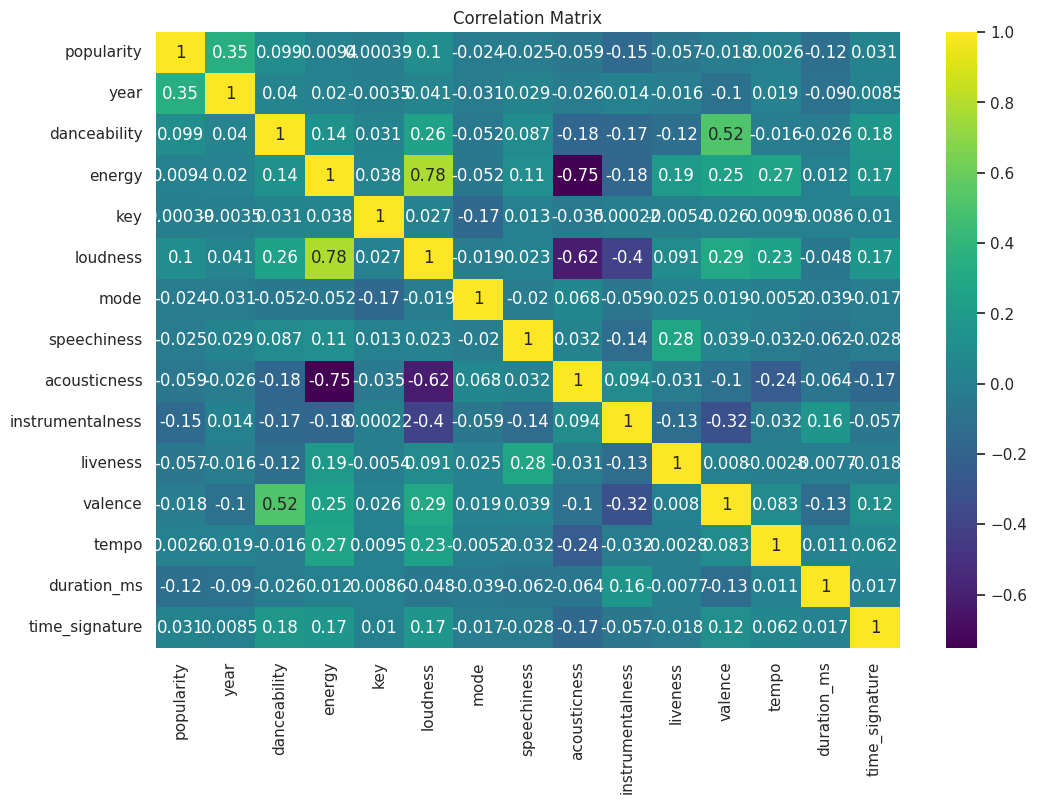

In [26]:
# Correlation matrix
correlation_matrix = numerical_cols_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

- Features that seem not to be relevant
  - Mode
  - Key
  - Year
  - popularity
  - duration_ms/minutes

In [27]:
# One-Hot Encoding for Genre
# This converts the 'genre' column into multiple binary columns (one per genre)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
genre_encoded = encoder.fit_transform(df[['genre']])

# Create a new DataFrame with the encoded genres
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['genre']))

# Merge the encoded genre columns with the original dataset
df_encoded = pd.concat([numerical_cols_df, genre_encoded_df], axis=1)

# Compute correlation between genres and popularity
correlations = df_encoded.corr()['popularity'].sort_values(ascending=False)

# Display the correlations
print(correlations)

# Step 8: Visualize the correlation between genres and popularity
# plt.figure(figsize=(10, 8))
# sns.barplot(y=correlations.index, x=correlations.values, palette="viridis")
# plt.title("Correlation between Genres and Popularity")
# plt.xlabel("Correlation with Popularity")
# plt.ylabel("Genres")
# plt.show()

popularity           1.000000
year                 0.345820
genre_hip-hop        0.148253
genre_dance          0.117155
loudness             0.104100
                       ...   
genre_grindcore     -0.081368
genre_heavy-metal   -0.084771
genre_tango         -0.096070
duration_ms         -0.118490
instrumentalness    -0.152899
Name: popularity, Length: 97, dtype: float64


<ipython-input-28-b308cc9a2e69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlations.index, x=correlations.values, palette="viridis")


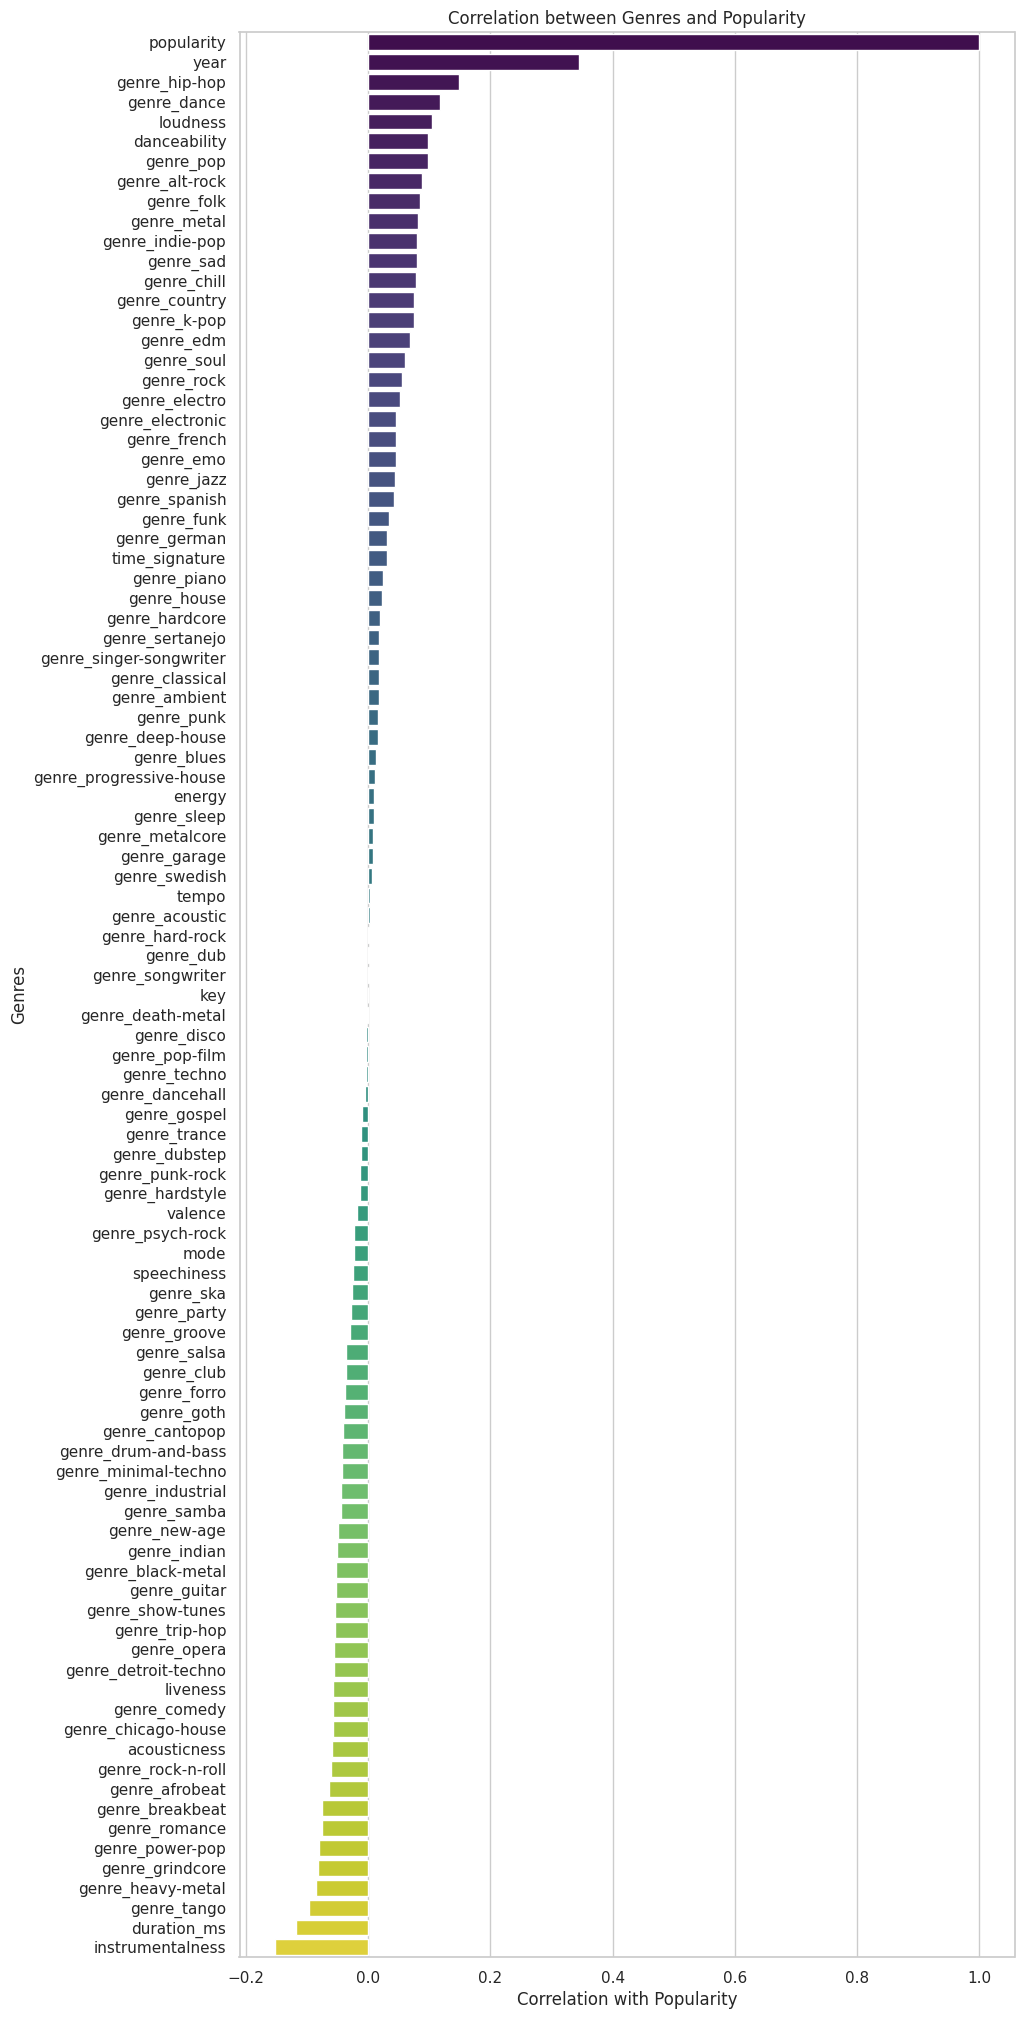

In [28]:
# Visualize the correlation between genres and popularity
plt.figure(figsize=(10, 25))
sns.barplot(y=correlations.index, x=correlations.values, palette="viridis")
plt.title("Correlation between Genres and Popularity")
plt.xlabel("Correlation with Popularity")
plt.ylabel("Genres")
plt.show()

In [29]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'duration_minutes'],
      dtype='object')

In [30]:
df = df.drop(['duration_ms'], axis=1)
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_minutes'],
      dtype='object')

# Feature Engineering

In [31]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,4.002767
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,3.606450
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4,2.649333
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4,5.071550
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4,4.072000


| Feature Name | Description |
|---|---|
| popularity | A measure of the song's popularity on Spotify |
| year | The year the song was released |
| genre | The primary genre of the song |
| danceability | Describes how suitable the track is for dancing |
| energy | Represents the perceived intensity and activity level of the track |
| key | The musical key of the song |
| loudness | The overall loudness of the track |
| mode | Indicates whether the track is in major (1) or minor (0) key |
| speechiness | The presence of spoken words in the track |
| acousticness | A confidence measure of whether the track is acoustic |
| instrumentalness | The presence of vocals in the track |
| liveness | A confidence measure of whether the track was performed live |
| valence | The positivity conveyed by the track |
| tempo | The average tempo of the track in beats per minute (BPM) |
| time_signature | The time signature of the track |
| duration_minutes | The duration of the track in minutes |

## Start by scaling the numerical features

In [32]:
numerical_features = numerical_cols_df.drop(columns=['popularity', 'mode', 'duration_ms', 'key', 'year'])

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

In [34]:
# Extract features for processing
genres = df['genre'].values
numerical_features.values

print(genres)
print(numerical_features)

['acoustic' 'acoustic' 'acoustic' ... 'trip-hop' 'trip-hop' 'trip-hop']
         danceability  energy  loudness  speechiness  acousticness  \
0               0.483   0.303   -10.058       0.0429        0.6940   
1               0.572   0.454   -10.286       0.0258        0.4770   
2               0.409   0.234   -13.711       0.0323        0.3380   
3               0.392   0.251    -9.845       0.0363        0.8070   
4               0.430   0.791    -5.419       0.0302        0.0726   
...               ...     ...       ...          ...           ...   
1473391         0.373   0.742    -6.453       0.0736        0.3250   
1473392         0.516   0.675    -7.588       0.0326        0.7880   
1473393         0.491   0.440    -8.512       0.0274        0.4770   
1473394         0.480   0.405   -13.343       0.0276        0.4310   
1473395         0.782   0.861    -7.292       0.1250        0.2200   

         instrumentalness  liveness  valence    tempo  time_signature  
0              

In [35]:
# One hot encoding for genres
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
genre_features = encoder.fit_transform(genres.reshape(-1, 1))

# Concatenate song features with genre features
combined_features = np.hstack((numerical_features, genre_features))

In [38]:
pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=66877c64bd6814783830d6eaffedd87610a9d7bebbe1f504041347872f789534
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [39]:
# Build the Annoy Index with Combined Features
from annoy import AnnoyIndex

num_features = combined_features.shape[1]
n_trees = 10  # Tune based on speed/accuracy trade-off

# Create Annoy index
annoy_index = AnnoyIndex(num_features, 'angular')

# Add each combined feature vector to Annoy index
for i, vector in enumerate(combined_features):
    annoy_index.add_item(i, vector)

# Build the index
annoy_index.build(n_trees)

True

In [40]:
num_features

92

In [41]:
# Query the Index
query_index = 20  # Index of the song you want to query
top_k = 10  # Number of similar songs to retrieve

# Retrieve top-k similar songs
similar_song_indices = annoy_index.get_nns_by_item(query_index, top_k, include_distances=True)
print("Similar songs:", similar_song_indices)

Similar songs: ([20, 213278, 667085, 793730, 1066677, 1113531, 421845, 623067, 926616, 1113547], [0.0, 0.001176554011180997, 0.0013716287212446332, 0.0020384362433105707, 0.0021523218601942062, 0.002291648183017969, 0.0025124158710241318, 0.00272339372895658, 0.0029803395736962557, 0.0029850867576897144])


In [42]:
# Dictionary mapping from index to song name
df = df.reset_index(drop=True)
index_to_song_name = df['track_name'].to_dict()
# index_to_song_name

In [43]:
hiphop_songs = df[df['genre']== 'hip-hop']
hiphop_songs.shape

(15703, 19)

In [44]:
def get_similar_songs_with_genres(track_name, top_k=15):
    # Find the index for the song name
    query_index = df[df['track_name'] == track_name].index[0]

    # Get the name of the queried song
    queried_song_name = index_to_song_name[query_index]

    # Query Annoy for similar song indices
    similar_indices = annoy_index.get_nns_by_item(query_index, top_k)

    # Retrieve song names and genres for similar songs
    similar_songs = []
    for idx in similar_indices:
        track_name = index_to_song_name[idx]
        song_genre = df.loc[idx, 'genre']  # Retrieve the genre from the DataFrame
        similar_songs.append((track_name, song_genre))

    return queried_song_name, similar_songs

In [45]:
# Sample song title to test
sample_song = "I Knew You Were Trouble."

# Run the recommendation function
queried_song, recommendations = get_similar_songs_with_genres(sample_song, top_k=20)

# Display the results
print(f"Recommendations for '{queried_song}'\n")
for i, (track, genre) in enumerate(recommendations, start=1):
    print(f"{i}. {track} ___ Genre: {genre}")

Recommendations for 'I Knew You Were Trouble.'

1. I Knew You Were Trouble. ___ Genre: pop
2. Risalah Hati ___ Genre: pop
3. Angels Or Devils ___ Genre: pop
4. Even Then ___ Genre: pop
5. I'm not Pretty ___ Genre: pop
6. Soldier (feat. T.I. & Lil' Wayne) ___ Genre: pop
7. Read Your Mind ___ Genre: pop
8. After The Storm (feat. Tyler, The Creator & Bootsy Collins) ___ Genre: pop
9. Quien La Vio Llorar ___ Genre: pop
10. Stillness Of Heart ___ Genre: pop
11. Inalcanzable ___ Genre: pop
12. After The Storm ___ Genre: pop
13. Normal Girl ___ Genre: pop
14. Esa Mujer (Bachata) ___ Genre: pop
15. Do You Like Me? ___ Genre: pop
16. 214 ___ Genre: pop
17. Take A Message ___ Genre: pop
18. 爸我回來了 ___ Genre: pop
19. I'll Take Her - Brian's Flow ___ Genre: hardcore
20. American Kids ___ Genre: country


In [46]:
df_artist = df[df['artist_name']== 'Taylor Swift']
df_artist.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
40355,Taylor Swift,I Knew You Were Trouble.,6FB3v4YcR57y4tXFcdxI1E,76,2012,pop,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,4,3.662000
40360,Taylor Swift,We Are Never Ever Getting Back Together,0VwNdo84DaVYLIkbVO86ND,74,2012,pop,0.628,0.676,7,-5.911,1,0.0916,0.00957,0.000027,0.1210,0.750,85.984,4,3.219117
40369,Taylor Swift,22,6ce41JVa6KFaryfmC2bu2W,68,2012,pop,0.661,0.729,7,-6.561,1,0.0376,0.00215,0.001300,0.0477,0.668,103.987,4,3.868667
40374,Taylor Swift,Red,0cITLOYn1Sv4q27zZPqlNK,60,2012,pop,0.602,0.896,1,-4.267,0,0.0437,0.07730,0.000089,0.0910,0.641,124.978,4,3.680450
40377,Taylor Swift,Safe & Sound - from The Hunger Games Soundtrack,0z9UVN8VBHJ9HdfYsOuuNf,64,2012,pop,0.471,0.300,7,-10.807,1,0.0280,0.88300,0.000010,0.0698,0.289,144.319,4,4.001117


In [48]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# # Assuming you want to create 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(reduced_data)



df = pd.DataFrame(reduced_data, columns=['PCA Component 1', 'PCA Component 2'])
df['Cluster'] = clusters

# Using Plotly to create an interactive scatter plot
fig = px.scatter(df, x='PCA Component 1', y='PCA Component 2', color='Cluster',
                 title="Song Clusters", color_continuous_scale='Viridis',
                 labels={'color': 'Cluster'}, opacity=0.7)
fig.update_layout(width=800, height=400)
fig.show()

Output hidden; open in https://colab.research.google.com to view.